Est noise:  -52.2658400981


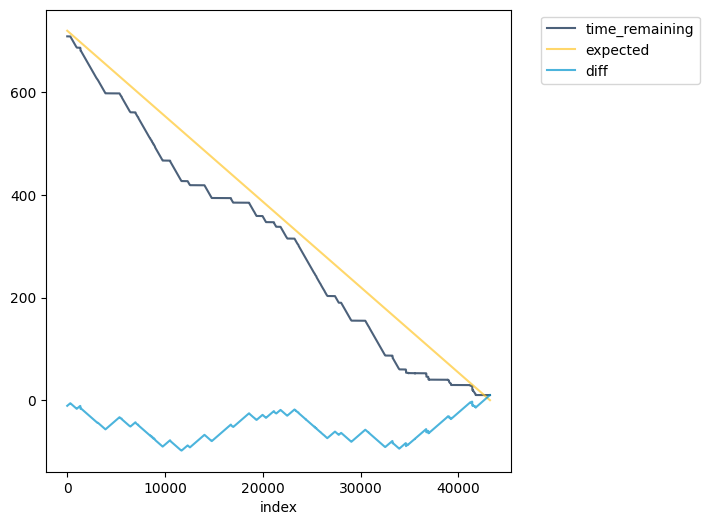

In [47]:
# What percent of our extracted timestamps are useable?

import os
import json
from matplotlib import pyplot as plt
import numpy as np
from datascience import *
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import tqdm

timestamps_dir_path = '/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamps'
post_processed_timestamps_dir_path = timestamps_dir_path + '/post-processed'
post_processed_timestamps_paths = [os.path.join(post_processed_timestamps_dir_path, f) for f in os.listdir(post_processed_timestamps_dir_path)]
example_timestamp_file = post_processed_timestamps_paths[712]

def get_time_remaing_array_from_fp(fp):
    try:
        arr = []
        with open(fp, 'r') as f:
            data = json.load(f)
        for k in data:
            tr = data[k]['time_remaining']
            arr.append(float(tr))
        return np.array(arr)
    except:
        return []

# example time remaining plot
time_remaining_arr = get_time_remaing_array_from_fp(example_timestamp_file)
expected_arr = np.arange(0, 720, 720 / len(time_remaining_arr))[::-1]
diff = time_remaining_arr - expected_arr

table = Table().with_columns(
    'time_remaining', time_remaining_arr,
    'index', np.arange(0, len(time_remaining_arr)),
    'expected', expected_arr,
    'diff', diff
)
table.plot('index')
print("Est noise: ", np.average(diff))

In [18]:
indices = []
timestamp_ids = []
timestamp_avg_noise = []

i = 0

# calculate how noisey each timestamp file is
for ts in tqdm.tqdm(post_processed_timestamps_paths):
    if '.json' not in ts:
        continue
    time_remaining_arr = get_time_remaing_array_from_fp(ts)
    expected_arr = np.arange(0, 720, 720 / len(time_remaining_arr))[::-1]
    time_remaining_arr.resize(expected_arr.shape)
    diff = time_remaining_arr - expected_arr
    avg_noise = np.average(diff)
    ts_id = ts.split('/')[-1].split('_')[0]
    timestamp_ids.append(ts_id)
    timestamp_avg_noise.append(avg_noise)

    indices.append(i)
    i += 1


100%|██████████| 1234/1234 [00:21<00:00, 57.82it/s]


In [56]:
# remove noisy timestamps

all_timestamp_noise_values = Table().with_columns(
    'index', indices,
    'id', timestamp_ids,
    'avg_noise', timestamp_avg_noise,
    'in_range', np.less(timestamp_avg_noise, 50) & np.greater(timestamp_avg_noise, -75)
)
filtered_timestamps = all_timestamp_noise_values.where('in_range', are.equal_to(True)).drop('in_range')
filtered_timestamps

index,id,avg_noise
0,18021,-52.5093
1,17733,12.3966
2,18022,-8.1976
3,17871,10.6085
5,18109,-25.3072
6,17605,-33.06
7,17709,-12.9954
8,17609,46.4357
9,18031,23.1713
10,17898,-3.47064
